In [5]:
import pandas as pd
import joblib

joblib.dump(model, "../models/linear_regression.pkl")

# Load the processed dataset
df = pd.read_csv("../data/processed_bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Display dataset
df.head()


,Open,High,Low,Close,Volume,Close_Scaled,Prediction
Date,,,,,,,
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,0.035173,0.069448
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,0.031686,0.070143
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,0.037456,0.069421
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,0.038497,0.068592
2020-01-06,7769.219238,7781.867188,7409.292969,7410.452148,23276261598,0.038497,0.066843


In [2]:
# Define input (X) and target (y)
X = df[["Close_Scaled"]]  # Input feature
y = df["Prediction"]  # Target variable (Bitcoin price shifted forward)

# Split into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show dataset sizes
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])


Training data size: 1176
Testing data size: 295


In [3]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Convert predictions back to original scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions_rescaled = np.interp(predictions, (0, 1), (df["Close"].min(), df["Close"].max()))
y_test_rescaled = np.interp(y_test, (0, 1), (df["Close"].min(), df["Close"].max()))

# Calculate error metrics
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 4968.41
Mean Squared Error (MSE): 45566823.12


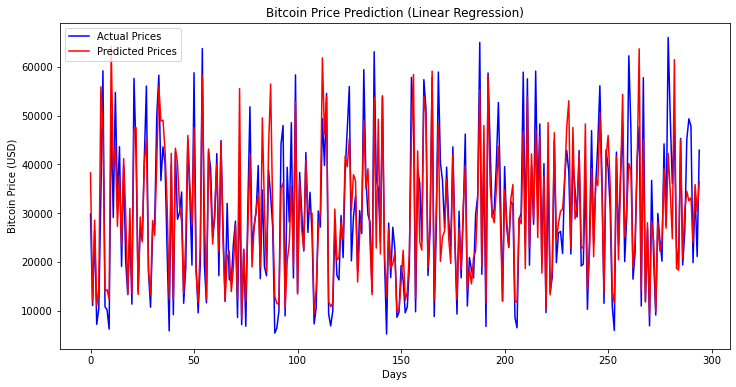

In [4]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Prices", color="blue")
plt.plot(predictions_rescaled, label="Predicted Prices", color="red")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Prediction (Linear Regression)")
plt.show()
